In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


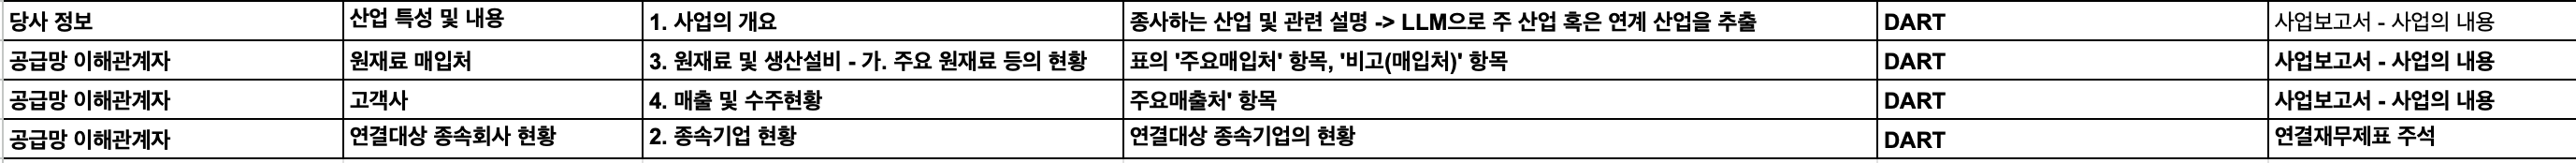

가져와야 하는 내용  
1. 사업의 내용
2. 연결재무제표 주석  
  
  내 API key: ~~~

In [ ]:
!pip install opendartreader

In [ ]:
# 기본 라이브러리 임포트
import pandas as pd
import requests
import xml.etree.ElementTree as ET
import zipfile
import io
import os
import json
import numpy as np
import datetime
try:
    from pandas import json_normalize
except ImportError:
    from pandas.io.json import json_normalize
import OpenDartReader
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# OpenDartReader API 키 설정
api_key = ''
dart = OpenDartReader(api_key)

In [ ]:
# 코스피 종목 데이터 불러오기
kospi = pd.read_csv('/content/drive/MyDrive/0.mirae/dartinfo/data_3559_20240718(kospi).csv', encoding='euc-kr')
kospi[0:30]

,표준코드,단축코드,한글 종목명,한글 종목약명,영문 종목명,상장일,시장구분,증권구분,소속부,주식종류,액면가,상장주식수
0,KR7095570008,095570,AJ네트웍스보통주,AJ네트웍스,"AJ Networks Co.,Ltd.",2015/08/21,KOSPI,주권,NaN,보통주,1000,45252759
1,KR7006840003,006840,AK홀딩스보통주,AK홀딩스,"AK Holdings, Inc.",1999/08/11,KOSPI,주권,NaN,보통주,5000,13247561
2,KR7282330000,282330,BGF리테일보통주,BGF리테일,BGF Retail,2017/12/08,KOSPI,주권,NaN,보통주,1000,17283906
3,KR7027410000,027410,BGF보통주,BGF,BGF,2014/05/19,KOSPI,주권,NaN,보통주,1000,95716791
4,KR7138930003,138930,BNK금융지주보통주,BNK금융지주,BNK Financial Group Inc.,2011/03/30,KOSPI,주권,NaN,보통주,5000,322088438
5,KR7001461003,001465,BYC1우선주,BYC우,BYC(1P),1989/09/05,KOSPI,주권,NaN,구형우선주,500,2153850
6,KR7001460005,001460,BYC보통주,BYC,BYC,1975/06/02,KOSPI,주권,NaN,보통주,500,6246150
7,KR7001041003,001045,CJ1우선주,CJ우,CJ(1P),1989/08/18,KOSPI,주권,NaN,구형우선주,5000,2260223
8,KR700104K010,00104K,CJ4우선주(전환),CJ4우(전환),CJ(4PC),2019/08/09,KOSPI,주권,NaN,신형우선주,5000,4226512
9,KR7001040005,001040,CJ보통주,CJ,CJ Corp.,1973/06/29,KOSPI,주권,NaN,보통주,5000,29176998


In [ ]:
# 대상 기업 단축코드 리스트로 저장
kospi_code_list = kospi['단축코드'].to_list()
kospi_code_list

['095570',
 '006840',
 '282330',
 '027410',
 '138930',
 '001465',
 '001460',
 '001045',
 '00104K',
 '001040',
 '011155',
 '011150',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '139130',
 '001530',
 '000215',
 '000210',
 '37550K',
 '37550L',
 '375500',
 '155660',
 '069730',
 '017860',
 '017940',
 '365550',
 '383220',
 '007700',
 '078935',
 '006360',
 '078930',
 '012630',
 '294870',
 '097230',
 '014790',
 '204320',
 '060980',
 '035000',
 '003560',
 '175330',
 '234080',
 '001065',
 '001067',
 '001060',
 '096760',
 '105560',
 '432320',
 '009070',
 '003620',
 '016380',
 '001390',
 '033180',
 '001940',
 '025000',
 '092230',
 '000040',
 '093050',
 '003555',
 '034220',
 '003550',
 '051905',
 '051900',
 '373220',
 '032640',
 '011070',
 '066575',
 '066570',
 '051915',
 '051910',
 '079550',
 '010120',
 '000680',
 '006260',
 '229640',
 '108320',
 '001120',
 '023150',
 '035420',
 '181710',
 '338100',
 '034310',
 '008260',
 '004255',
 '004250',
 '456040',
 '010955',
 '010950',
 '005090',

## DART 사업보고서 공시 항목 크롤링

### 2024년 '정기보고서' 목록 수집 및 '사업보고서'만 가져오기

In [ ]:
# 2024년 기업의 정기보고(kind = 'A') 보고서 rcept_no 불러오기
# dart.list(kospi_code_list[1], start = '2024', kind = 'A')

latest_reports = pd.DataFrame()
error_count = 0

for kospi_code in kospi_code_list:
    try:
        # 2024년에 공시된 정기보고서 목록 가져오기
        reports = dart.list(corp=kospi_code, start='2024', kind='A')

        if not reports.empty:
            # 올해의 첫 보고서 가져오기 (마지막 인덱스): 전년도 사업보고서
            latest_report = reports.iloc[-1]
            latest_reports = pd.concat([latest_reports, latest_report.to_frame().T], ignore_index=True)
        else:
            print(f"No reports found for {kospi_code}")
    except Exception as e:
        print(f"Error processing {kospi_code}: {e}")
        error_count += 1

In [ ]:
# 데이터 확인

latest_reports.info()
# latest_reports.head()
# latest_reports.to_csv('/content/drive/MyDrive/0.mirae/lists_to_crawl0727.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   corp_code   830 non-null    object
 1   corp_name   830 non-null    object
 2   stock_code  830 non-null    object
 3   corp_cls    830 non-null    object
 4   report_nm   830 non-null    object
 5   rcept_no    830 non-null    object
 6   flr_nm      830 non-null    object
 7   rcept_dt    830 non-null    object
 8   rm          830 non-null    object
dtypes: object(9)
memory usage: 58.5+ KB


In [ ]:
# 중간 저장
reports.to_csv('/content/drive/MyDrive/0.mirae/dartinfo/lists_to_crawl0730.csv')

In [ ]:
# 하위보고서 인덱스 및 이름 확인
sub_report = dart.sub_docs('20240313001451')
sub_report

,title,url
0,사 업 보 고 서,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...
1,【 대표이사 등의 확인 】,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...
2,I. 회사의 개요,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...
3,1. 회사의 개요,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...
4,2. 회사의 연혁,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...
5,3. 자본금 변동사항,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...
6,4. 주식의 총수 등,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...
7,5. 정관에 관한 사항,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...
8,II. 사업의 내용,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...
9,1. (제조서비스업)사업의 개요,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...


### 필요한 하위 보고서 URL 크롤링

In [ ]:
# 하위보고서인 사업의 내용, 원재료 및 생산설비, 매출 및 수주현황, 연결재무제표 URL 저장할 리스트
urls_to_crawl = []

for index, row in latest_reports.iterrows():
    try:
        # rcept_no 가져오기, 읽기 위해 문자열로 변환
        rcept_no = str(row['rcept_no'])

        # 하위 보고서 목록 가져오기
        sub_report = dart.sub_docs(rcept_no)

        # 필요한 보고서 인덱스와 타이틀
        needed_indexes = [9, 11, 12]
        needed_titles = ['3. 연결재무제표 주석', 'XII. 상세표']

        # 빈 리스트 생성
        temp_list = []

        # 인덱스로 URL 가져오기
        for i, title in zip(needed_indexes, ['1. 사업의 개요', '3. 원재료 및 생산설비', '4. 매출 및 수주현황']):
            try:
                url = sub_report.iloc[i]['url']
            except IndexError:
                url = ''
            temp_list.append({'url': url, 'stock_code': row['stock_code'], 'title': title})

        # 타이틀로 URL 가져오기
        for title in needed_titles:
            try:
                url = sub_report[sub_report['title'] == title]['url'].values[0]
            except IndexError:
                url = ''
            temp_list.append({'url': url, 'stock_code': row['stock_code'], 'title': title})

        # 데이터프레임으로 변환 후 리스트에 추가
        needed_urls = pd.DataFrame(temp_list)
        urls_to_crawl.append(needed_urls)

    except Exception as e:
        print(f"Error processing {row['corp_name']} with rcept_no {rcept_no}: {e}")

df_needed_urls = pd.concat(urls_to_crawl, ignore_index=True)

In [ ]:
# 중간 저장: 사업보고서 크롤링한 url 저장
df_needed_urls.to_csv('/content/drive/MyDrive/0.mirae/dartinfo/urls_to_crawl0730.csv')
# df_needed_urls = pd.read_csv('/content/drive/MyDrive/0.mirae/urls_to_crawl0730.csv', index_col=0)

In [ ]:
df_needed_urls

,url,stock_code,title
0,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,095570,1. 사업의 개요
1,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,095570,3. 원재료 및 생산설비
2,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,095570,4. 매출 및 수주현황
3,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,095570,3. 연결재무제표 주석
4,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,095570,XII. 상세표
...,...,...,...
4145,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,003280,1. 사업의 개요
4146,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,003280,3. 원재료 및 생산설비
4147,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,003280,4. 매출 및 수주현황
4148,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,003280,3. 연결재무제표 주석


### 각 하위보고서 내용 크롤링
- URL 방문하여 각 정보 수집 및 데이터프레임으로 저장

In [ ]:
# 크롤링한 텍스트를 저장할 리스트
crawled_data = []

for index, row in df_needed_urls.iterrows():
    try:
        url = row['url']

        # URL이 빈 문자열인지 확인
        if not url:
            continue

        # HTML 가져오기
        response = requests.get(url)
        response.raise_for_status()

        # BeautifulSoup으로 파싱
        soup = BeautifulSoup(response.text, 'html.parser')

        # 전체 텍스트 추출
        text = soup.get_text(separator='\n', strip=True)

        crawled_data.append({
            'stock_code': row['stock_code'],
            'title': row['title'],
            'text': text
        })
    except Exception as e:
        print(f"Error crawling {url}: {e}, stock_code: {row['stock_code']}, title: {row['title']}")

# DataFrame으로 변환
final_df = pd.DataFrame(crawled_data)

# 결과 출력
print(final_df.head())

  stock_code          title                                               text
0     095570      1. 사업의 개요  1. 사업의 개요\n당사는 수익을 창출하는 서비스 상품의 성격을 고려하여 경영의 다...
1     095570  3. 원재료 및 생산설비  3. 원재료 및 생산설비\n(1) 영업용 설비 현황\n(단위 :㎡)\n부 문\n지점...
2     095570   4. 매출 및 수주현황  4. 매출 및 수주상황\n가. 사업부문별 요약 재무현황\n(단위 : 백만원)\n부문...
3     095570   3. 연결재무제표 주석  3. 연결재무제표 주석\n제 24(당) 기   2023년 12월 31일 현재\n제 ...
4     095570       XII. 상세표  XII. 상세표\n1. 연결대상 종속회사 현황(상세)\n☞ 본문 위치로 이동\n(단...


In [ ]:
# 중간 저장
final_df.to_csv('/content/drive/MyDrive/0.mirae/dartinfo/report_parttext0730.csv')

In [ ]:
final_df

,stock_code,title,text
0,095570,1. 사업의 개요,1. 사업의 개요\n당사는 수익을 창출하는 서비스 상품의 성격을 고려하여 경영의 다...
1,095570,3. 원재료 및 생산설비,3. 원재료 및 생산설비\n(1) 영업용 설비 현황\n(단위 :㎡)\n부 문\n지점...
2,095570,4. 매출 및 수주현황,4. 매출 및 수주상황\n가. 사업부문별 요약 재무현황\n(단위 : 백만원)\n부문...
3,095570,3. 연결재무제표 주석,3. 연결재무제표 주석\n제 24(당) 기 2023년 12월 31일 현재\n제 ...
4,095570,XII. 상세표,XII. 상세표\n1. 연결대상 종속회사 현황(상세)\n☞ 본문 위치로 이동\n(단...
...,...,...,...
4027,003280,1. 사업의 개요,1. 사업의 개요\n가. 업계의 현황\n(1) 해운업의 특성\n해운업은 선박의 공간...
4028,003280,3. 원재료 및 생산설비,3. 원재료 및 생산설비\n가. 생산능력 및 생산능력의 산출근거\n(1) 생산능력\...
4029,003280,4. 매출 및 수주현황,4. 매출 및 수주상황\n가. 매출실적\n(단위 : 백만원)\n사업부문\n제63기 ...
4030,003280,3. 연결재무제표 주석,3. 연결재무제표 주석\n제 63(당) 기 : 2023년 12월 31일 현재\n제 ...


### 초기 전처리
- HyperClova X API로 주요 내용 추출 가능하도록 기본적인 전처리만 진행

In [ ]:
# 전처리 함수
import re

def clean_text(text):
    # 특수 문자 제거
    text = re.sub(r'[@%\\*=()/~#&\+\-\,\_\~\$\'\"]', '', text)
    text = re.sub(r'\s+', ' ', text)  # 연속된 공백을 하나로 치환
    text = re.sub(r'\n', ' ', text)   # 줄바꿈 제거
    text = re.sub(r'\xa0', ' ', text) # 비정상 공백 제거
    text = re.sub(r'\△', '-', text)   # 특수 문자 변환
    return text.strip()

In [ ]:
# DART 사업보고서 항목 기본 전처리
final_df = final_df.assign(cleaned_text=final_df.iloc[:, 2].apply(clean_text))

# 결과 출력
final_df.head()

,stock_code,title,text,cleaned_text
0,095570,1. 사업의 개요,1. 사업의 개요\n당사는 수익을 창출하는 서비스 상품의 성격을 고려하여 경영의 다...,1. 사업의 개요 당사는 수익을 창출하는 서비스 상품의 성격을 고려하여 경영의 다각...
1,095570,3. 원재료 및 생산설비,3. 원재료 및 생산설비\n(1) 영업용 설비 현황\n(단위 :㎡)\n부 문\n지점...,3. 원재료 및 생산설비 1 영업용 설비 현황 단위 :㎡ 부 문 지점센터 소재지 토...
2,095570,4. 매출 및 수주현황,4. 매출 및 수주상황\n가. 사업부문별 요약 재무현황\n(단위 : 백만원)\n부문...,4. 매출 및 수주상황 가. 사업부문별 요약 재무현황 단위 : 백만원 부문 구 분 ...
3,095570,3. 연결재무제표 주석,3. 연결재무제표 주석\n제 24(당) 기 2023년 12월 31일 현재\n제 ...,3. 연결재무제표 주석 제 24당 기 2023년 12월 31일 현재 제 23전 기 ...
4,095570,XII. 상세표,XII. 상세표\n1. 연결대상 종속회사 현황(상세)\n☞ 본문 위치로 이동\n(단...,XII. 상세표 1. 연결대상 종속회사 현황상세 ☞ 본문 위치로 이동 단위 : 원 ...


In [ ]:
# 최종 파일 저장
final_df.to_csv('/content/drive/MyDrive/0.mirae/dartinfo/report_fulltext0730.csv')

In [ ]:
# 추가
# 종목코드 여섯 자리로 맞추는 코드
final_df['stock_code'] = final_df['stock_code'].apply(lambda x: str(x).zfill(6))